In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split

%config InlineBackend.figure_format='svg'

G:\newage2\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
df=pd.read_csv('train_Data.csv')

In [3]:
df.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8'], dtype='object')

In [4]:
df_min=df[df['8']==1]

In [5]:
df_min.to_csv('pima_minority_train.csv',index=False)
df_min=pd.read_csv('pima_minority_train.csv')

In [6]:
df_majority=df[df['8']==0]
df_majority.to_csv('pima_majority_train.csv',index=False)
df_majority=pd.read_csv('pima_majority_train.csv')

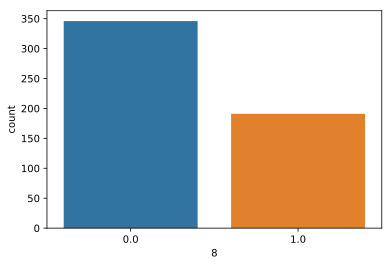

In [7]:
%matplotlib inline
sns.countplot(x='8',data=df)

In [8]:
def create_dataset(dataset,look_back=1):
    
    datax,datay=[],[]
    
    for i in range(len(dataset)-look_back-1):
        a=dataset[i:(i+look_back),:]
        datax.append(a)
        datay.append(dataset[i+look_back,:])
    
    return np.array(datax),np.array(datay)

In [9]:
df_minor=np.array(df_min)
scaler=MinMaxScaler(feature_range=(0,1))

df_minor=scaler.fit_transform(df_min)

x,y=create_dataset(df_minor,3)#5
print(x.shape)
print(y.shape)

(187, 3, 9)
(187, 9)


In [10]:
Xtrain,xtest,Ytrain,ytest=train_test_split(x,y,test_size=0.40,random_state=60)

In [11]:
model=Sequential()
model.add(LSTM(20,input_shape=(Xtrain.shape[1],Xtrain.shape[2])))#5
model.add(Dense(9))

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 20)                2400      
_________________________________________________________________
dense_1 (Dense)              (None, 9)                 189       
Total params: 2,589
Trainable params: 2,589
Non-trainable params: 0
_________________________________________________________________
None


In [12]:
model.compile(loss='mse',optimizer='adam')

In [13]:
history=model.fit(Xtrain,Ytrain,epochs=500,verbose=1)

Epoch 1/500
112/112 [==============================] - 3s 31ms/step - loss: 0.1943
Epoch 2/500
112/112 [==============================] - 0s 488us/step - loss: 0.1788
Epoch 3/500
112/112 [==============================] - 0s 461us/step - loss: 0.1630
Epoch 4/500
112/112 [==============================] - 0s 470us/step - loss: 0.1479
Epoch 5/500
112/112 [==============================] - 0s 502us/step - loss: 0.1331
Epoch 6/500
112/112 [==============================] - 0s 506us/step - loss: 0.1195
Epoch 7/500
112/112 [==============================] - 0s 443us/step - loss: 0.1067
Epoch 8/500
112/112 [==============================] - 0s 416us/step - loss: 0.0947
Epoch 9/500
112/112 [==============================] - 0s 434us/step - loss: 0.0836
Epoch 10/500
112/112 [==============================] - 0s 488us/step - loss: 0.0730
Epoch 11/500
112/112 [==============================] - 0s 439us/step - loss: 0.0638
Epoch 12/500
112/112 [==============================] - 0s 492us/step - los

112/112 [==============================] - 0s 474us/step - loss: 0.0303
Epoch 98/500
112/112 [==============================] - 0s 430us/step - loss: 0.0303
Epoch 99/500
112/112 [==============================] - 0s 452us/step - loss: 0.0302
Epoch 100/500
112/112 [==============================] - 0s 412us/step - loss: 0.0302
Epoch 101/500
112/112 [==============================] - 0s 461us/step - loss: 0.0302
Epoch 102/500
112/112 [==============================] - 0s 412us/step - loss: 0.0302
Epoch 103/500
112/112 [==============================] - 0s 439us/step - loss: 0.0302
Epoch 104/500
112/112 [==============================] - 0s 398us/step - loss: 0.0301
Epoch 105/500
112/112 [==============================] - 0s 434us/step - loss: 0.0301
Epoch 106/500
112/112 [==============================] - 0s 452us/step - loss: 0.0301
Epoch 107/500
112/112 [==============================] - 0s 425us/step - loss: 0.0301
Epoch 108/500
112/112 [==============================] - 0s 439us/step

112/112 [==============================] - 0s 515us/step - loss: 0.0286
Epoch 193/500
112/112 [==============================] - 0s 457us/step - loss: 0.0286
Epoch 194/500
112/112 [==============================] - 0s 403us/step - loss: 0.0286
Epoch 195/500
112/112 [==============================] - 0s 430us/step - loss: 0.0286
Epoch 196/500
112/112 [==============================] - 0s 448us/step - loss: 0.0286
Epoch 197/500
112/112 [==============================] - 0s 448us/step - loss: 0.0285
Epoch 198/500
112/112 [==============================] - 0s 430us/step - loss: 0.0285
Epoch 199/500
112/112 [==============================] - 0s 448us/step - loss: 0.0285
Epoch 200/500
112/112 [==============================] - 0s 421us/step - loss: 0.0285
Epoch 201/500
112/112 [==============================] - 0s 403us/step - loss: 0.0285
Epoch 202/500
112/112 [==============================] - 0s 430us/step - loss: 0.0285
Epoch 203/500
112/112 [==============================] - 0s 430us/st

112/112 [==============================] - 0s 483us/step - loss: 0.0272
Epoch 288/500
112/112 [==============================] - 0s 479us/step - loss: 0.0272
Epoch 289/500
112/112 [==============================] - 0s 416us/step - loss: 0.0271
Epoch 290/500
112/112 [==============================] - 0s 448us/step - loss: 0.0271
Epoch 291/500
112/112 [==============================] - 0s 466us/step - loss: 0.0271
Epoch 292/500
112/112 [==============================] - 0s 466us/step - loss: 0.0271
Epoch 293/500
112/112 [==============================] - 0s 457us/step - loss: 0.0271
Epoch 294/500
112/112 [==============================] - 0s 421us/step - loss: 0.0271
Epoch 295/500
112/112 [==============================] - 0s 421us/step - loss: 0.0271
Epoch 296/500
112/112 [==============================] - 0s 412us/step - loss: 0.0270
Epoch 297/500
112/112 [==============================] - 0s 504us/step - loss: 0.0270
Epoch 298/500
112/112 [==============================] - 0s 403us/st

112/112 [==============================] - 0s 457us/step - loss: 0.0260
Epoch 383/500
112/112 [==============================] - 0s 403us/step - loss: 0.0261
Epoch 384/500
112/112 [==============================] - 0s 439us/step - loss: 0.0260
Epoch 385/500
112/112 [==============================] - 0s 430us/step - loss: 0.0260
Epoch 386/500
112/112 [==============================] - 0s 394us/step - loss: 0.0261
Epoch 387/500
112/112 [==============================] - 0s 448us/step - loss: 0.0260
Epoch 388/500
112/112 [==============================] - 0s 430us/step - loss: 0.0260
Epoch 389/500
112/112 [==============================] - 0s 403us/step - loss: 0.0261
Epoch 390/500
112/112 [==============================] - 0s 439us/step - loss: 0.0260
Epoch 391/500
112/112 [==============================] - 0s 412us/step - loss: 0.0260
Epoch 392/500
112/112 [==============================] - 0s 448us/step - loss: 0.0259
Epoch 393/500
112/112 [==============================] - 0s 430us/st

112/112 [==============================] - 0s 524us/step - loss: 0.0252
Epoch 478/500
112/112 [==============================] - 0s 488us/step - loss: 0.0251
Epoch 479/500
112/112 [==============================] - 0s 501us/step - loss: 0.0252
Epoch 480/500
112/112 [==============================] - 0s 474us/step - loss: 0.0251
Epoch 481/500
112/112 [==============================] - 0s 501us/step - loss: 0.0251
Epoch 482/500
112/112 [==============================] - 0s 564us/step - loss: 0.0251
Epoch 483/500
112/112 [==============================] - 0s 465us/step - loss: 0.0251
Epoch 484/500
112/112 [==============================] - 0s 501us/step - loss: 0.0251
Epoch 485/500
112/112 [==============================] - 0s 488us/step - loss: 0.0250
Epoch 486/500
112/112 [==============================] - 0s 466us/step - loss: 0.0251
Epoch 487/500
112/112 [==============================] - 0s 519us/step - loss: 0.0250
Epoch 488/500
112/112 [==============================] - 0s 466us/st

In [14]:
model.save('7-24-2019-pima.h5')

In [15]:
Xtrain.shape

(112, 3, 9)

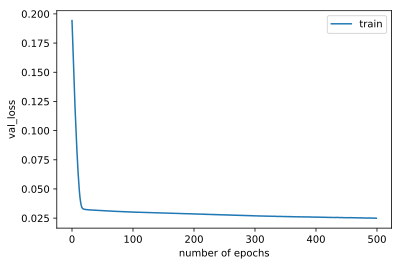

In [16]:
plt.plot(history.history['loss'],label='train')
#plt.plot(history.history['val_loss'],label='test')
plt.xlabel('number of epochs')
plt.ylabel('val_loss')
plt.legend()
#pyplot.savefig('LSTM training.png',dpi=300)
plt.show()

In [17]:
prediction=model.predict(xtest)

In [18]:
def draw_prediction(ytest,d,columns):
    
    _,axes=plt.subplots(len(columns),1,figsize=(10,20))
    
    for i,cols in enumerate(columns):
        
        axes[i].plot(ytest[:,i],label='real',color='blue')
        axes[i].plot(d[:,i],label='prediction',color='orange')
        #axes[i].set_xlabel='index'
        #axes[i].set_ylabel=cols
        axes[i].xlabel='index'
        axes[i].ylabel=cols

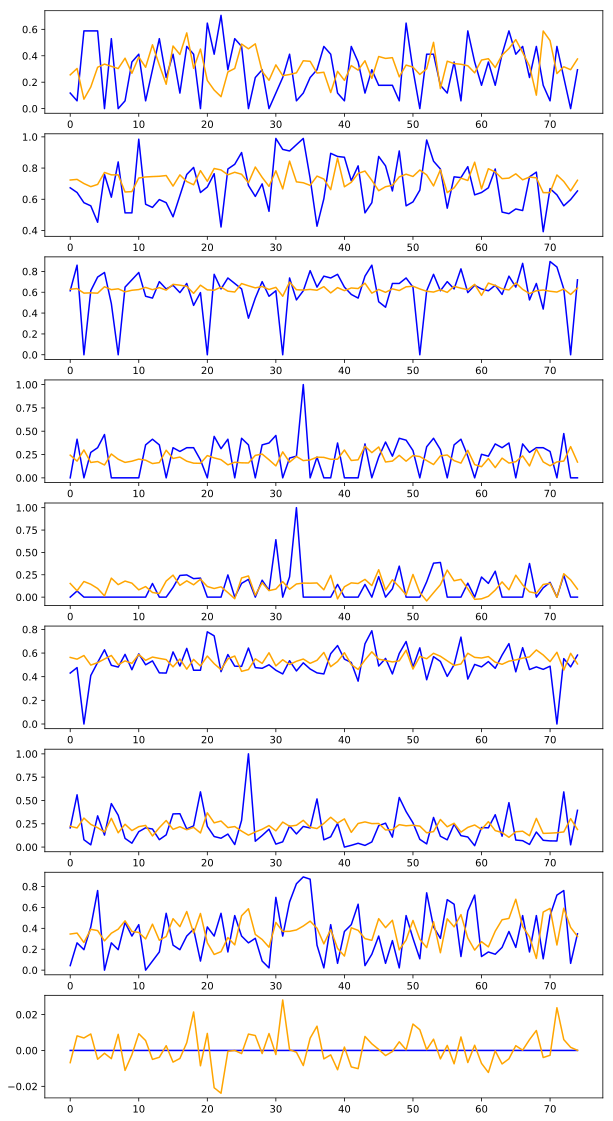

In [19]:
clmns=df.columns
draw_prediction(ytest,prediction,clmns)

In [20]:
prediction

array([[ 2.55373478e-01,  7.23260880e-01,  6.28685951e-01,
         2.43375406e-01,  1.52632684e-01,  5.63026369e-01,
         2.23678946e-01,  3.45250487e-01, -6.81107491e-03],
       [ 3.03775191e-01,  7.27350712e-01,  6.35224104e-01,
         1.79424107e-01,  7.13535026e-02,  5.48185468e-01,
         2.05030963e-01,  3.54425102e-01,  8.12054425e-03],
       [ 7.12532774e-02,  7.00700641e-01,  5.91439784e-01,
         2.99110323e-01,  1.74800515e-01,  5.79071403e-01,
         3.10850233e-01,  2.64369279e-01,  6.94890693e-03],
       [ 1.63451791e-01,  6.80725932e-01,  5.94233871e-01,
         1.64725691e-01,  1.44136071e-01,  4.98191476e-01,
         2.43809968e-01,  3.90464395e-01,  9.17232782e-03],
       [ 3.12903166e-01,  6.95082307e-01,  5.90856493e-01,
         1.74915269e-01,  9.67273489e-02,  5.18548846e-01,
         2.07809716e-01,  3.78411144e-01, -4.90332395e-03],
       [ 3.36801052e-01,  7.71977663e-01,  6.52728796e-01,
         1.37885749e-01,  1.38801858e-02,  5.494175

In [21]:
prediction2=scaler.inverse_transform(prediction)

In [22]:
ytest2=scaler.inverse_transform(ytest)

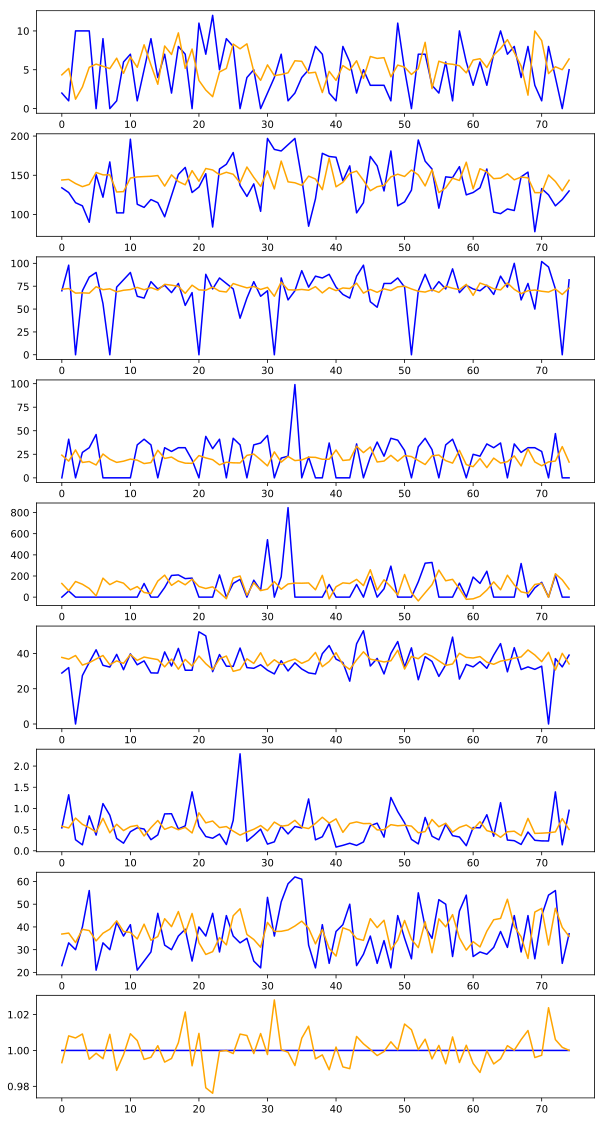

In [23]:
draw_prediction(ytest2,prediction2,clmns)

In [24]:
prediction

array([[ 2.55373478e-01,  7.23260880e-01,  6.28685951e-01,
         2.43375406e-01,  1.52632684e-01,  5.63026369e-01,
         2.23678946e-01,  3.45250487e-01, -6.81107491e-03],
       [ 3.03775191e-01,  7.27350712e-01,  6.35224104e-01,
         1.79424107e-01,  7.13535026e-02,  5.48185468e-01,
         2.05030963e-01,  3.54425102e-01,  8.12054425e-03],
       [ 7.12532774e-02,  7.00700641e-01,  5.91439784e-01,
         2.99110323e-01,  1.74800515e-01,  5.79071403e-01,
         3.10850233e-01,  2.64369279e-01,  6.94890693e-03],
       [ 1.63451791e-01,  6.80725932e-01,  5.94233871e-01,
         1.64725691e-01,  1.44136071e-01,  4.98191476e-01,
         2.43809968e-01,  3.90464395e-01,  9.17232782e-03],
       [ 3.12903166e-01,  6.95082307e-01,  5.90856493e-01,
         1.74915269e-01,  9.67273489e-02,  5.18548846e-01,
         2.07809716e-01,  3.78411144e-01, -4.90332395e-03],
       [ 3.36801052e-01,  7.71977663e-01,  6.52728796e-01,
         1.37885749e-01,  1.38801858e-02,  5.494175

In [25]:
new_data=pd.DataFrame(prediction2)

In [26]:
new_data.to_csv('new_corrected_data-v1-7-24-2019.csv',index=False)